#HW4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 
5. $S_0$ is (0, 3) and $S_T$ is (9,3) 

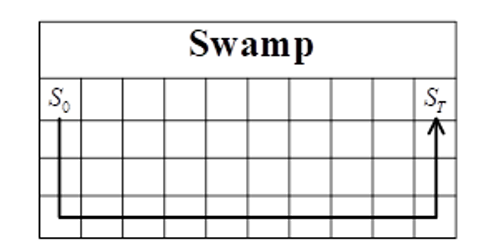

In [2]:
ACTIONS =np.array([[-1,0],[0,1],[1,0],[0,-1]])#左上右下


In [3]:
# Maintain state with list datatype.
def step(state, action):
    state_n = (np.array(state) + action).tolist()
    
    if state_n[0] >= 10 or state_n[0] < 0 or state_n[1] < 0 or state_n[1] >= 5:
        state_n = state
    
    if state_n[1] == 4:
        reward = -100
    else:
        reward = -1
    
    return state_n, reward

In [4]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(10):
    for j in range(5):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[i][4-j])
      if data[i][4-j][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[i][4-j][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[i][4-j][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[i][4-j][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.2f' %data[i][4-j][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.2f' %data[i][4-j][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.2f' %data[i][4-j][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.2f' %data[i][4-j][3], verticalalignment='center', horizontalalignment='center')
  #from google.colab import files #google.colab only
  plt.savefig("4.png")
  #files.download("3.png") #google.colab only

In [18]:
def Q_learning():
 
    returns = []
      
######## YOUR CODE HERE ########
    gamma = 1
    alpha = 0.1
    epsilon = 0.3
    simulate = 2000
    s0 = [0,3]
    st = [9,3]
    q_value = rd.random([10,5,4])
    q_value[st[0]][st[1]] = 0
    while simulate != 0:
      gain = 0
      state = s0
      while state != st:
        action = -1
        if rd.random() < epsilon:
          action = rd.randint(0,4)
        else: 
          action = np.argmax(q_value[state[0]][state[1]])
        next_state, reward = step(state,ACTIONS[action])
        q_value[state[0]][state[1]][action] += alpha * (reward + gamma * np.max(q_value[next_state[0]][next_state[1]]) - q_value[state[0]][state[1]][action])
        state = next_state
        gain+=reward
      returns.append(gain)
      simulate -= 1
####################################
    
    return returns, q_value

In [17]:
def sarsa():
  
    returns = []
  
      
######## YOUR CODE HERE ########
    gamma = 1
    alpha = 0.1
    epsilon = 0.3
    simulate = 2000
    s0 = [0, 3]
    st = [9, 3]
    q_value = rd.random([10,5,4])
    q_value[st[0]][st[1]] = 0 
    while simulate != 0 :
      gain = 0
      state = s0
      while state != st:
        action = -1
        if rd.random() < epsilon:
          action = rd.randint(0,4)
        else: 
          action = np.argmax(q_value[state[0]][state[1]])
        next_state, reward = step(state,ACTIONS[action])
        next_action = -1
        if rd.random() < epsilon:
          next_action = rd.randint(0,4)
        else: 
          next_action = np.argmax(q_value[next_state[0]][next_state[1]])
        q_value[state[0]][state[1]][action] += alpha * (reward + gamma *q_value[next_state[0]][next_state[1]][next_action] - q_value[state[0]][state[1]][action])
        state = next_state
        gain += reward
      returns.append(gain)
      simulate -= 1
   ####################################
    
    return returns, q_value

In [7]:
def episode(q_value):
    epsilon = 0.3
    s0 = [0, 3]
    st = [9, 3]
    returns = 0
    tra =[]
    state = s0
    while state != st:
      action = -1
      if rd.random() < epsilon:
          action = rd.randint(0,4)
      else: 
          action = np.argmax(q_value[state[0]][state[1]])
      next_state, reward = step(state,ACTIONS[action])
      tra.append([state,action,reward])
      state = next_state
        
    return tra

# Result(60%):

Average 30 simulation, 2000 episode per simulation.

In [8]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

In [25]:
def Monte_Carlo():
    q_value_table = []
    rewards_all = []
    for sim in range(5):
      q_value = rd.random([10,5,4])
      rewards = []
      q_value[9][3]=0
      for ep in range(2000):
        tra = episode(q_value)
        gain = 0 
        for t in range(len(tra)):
          G = 0
          for j in range(len(tra)-1,t-1,-1):
              G = tra[j][2] + 1 * G
          q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]] = q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]] + 0.1 * (G - q_value[tra[t][0][0]][tra[t][0][1]][tra[t][1]])
          gain += tra[t][2]
        rewards.append(gain)
      rewards = averages(rewards)
      rewards_all.append(rewards)
      q_value_table.append(q_value)
    t = np.array(rewards_all, dtype=object)
    plt.plot(np.average(t, axis = 0),label = 'Monte Carlo')
    # Q_value
    # drawTable(q_value_table)
    # from google.colab import files #google.colab only
    # plt.savefig("Monte_Carlo.png")
    # files.download("Monte_Carlo.png") #google.colab only
    # plt.close()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

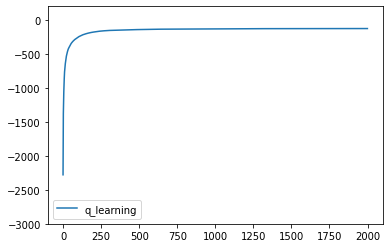

In [12]:
#Q-learning Q_value and plot reward learning
q_reward_all = []
average_q_value = []
for simulate in range(30):
  q_learning_reward, q_value = Q_learning()
  q_learning_reward = averages(q_learning_reward)
  q_reward_all.append(q_learning_reward)
  average_q_value.append(q_value)
average_q_value = np.average(average_q_value, axis = 0)
drawTable(average_q_value)
from google.colab import files #google.colab only
plt.savefig("Q_learning.png")
files.download("Q_learning.png") #google.colab only
plt.close()
plt.plot(np.average(q_reward_all,axis=0),label='q_learning')
plt.ylim(-3000, 200)
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

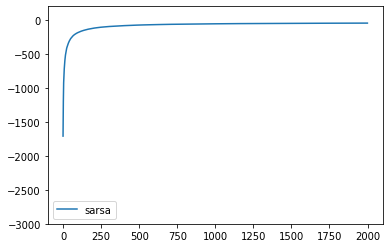

In [19]:
# Sarsa Q_value and plot reward learning
sarsa_reward_all = []
average_sarsa_value = []
for simulate in range(30):
  sarsa_reward,sarsa_q_value = sarsa()
  sarsa_reward = averages(sarsa_reward)
  sarsa_reward_all.append(sarsa_reward)
  average_sarsa_value.append(sarsa_q_value)
average_s_value = np.average(average_sarsa_value, axis = 0)
drawTable(average_s_value)
from google.colab import files #google.colab only
plt.savefig("Sarsa.png")
files.download("Sarsa.png") #google.colab only
plt.close()

plt.plot(np.average(sarsa_reward_all,axis=0),label='sarsa')
plt.ylim(-3000, 200)
plt.legend()
plt.show()

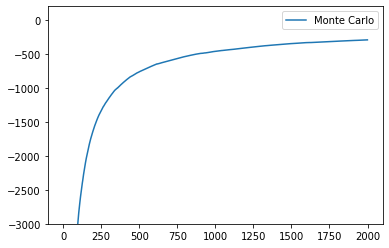

In [ ]:
#Q-learning Q_value and plot reward learning
Monte_Carlo()
plt.ylim(-3000, 200)
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the average rewards of Sarsa and Q-learning, and explain your result.(20%)
2. Plot the Q-values of Sarsa and Q-learning, and explain your result.(10%)
2. Complete Monte Carlo, and compare average rewards.(10%) 



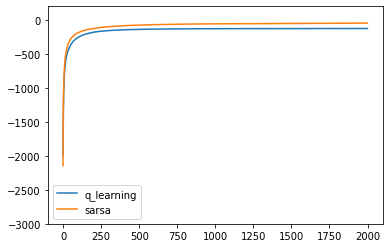

In [22]:
plot_q_reward = []
average_q_value = []
plot_s_reward = []
average_s_value = []
for simulate in range(30):
    q_reward,tempQ = Q_learning()
    s_reward,tempS = sarsa()
    q_reward = averages(q_reward)
    s_reward = averages(s_reward)
    plot_q_reward.append(q_reward)
    average_q_value.append(tempQ)
    plot_s_reward.append(s_reward)
    average_s_value.append(tempS)
    
average_q_value = np.average(average_q_value, axis = 0)
average_s_value = np.average(average_s_value, axis = 0)
plt.plot(np.average(plot_q_reward,axis=0),label='q_learning')
plt.plot(np.average(plot_s_reward,axis=0),label='sarsa')
plt.ylim(-3000, 200)
plt.legend()
plt.show()

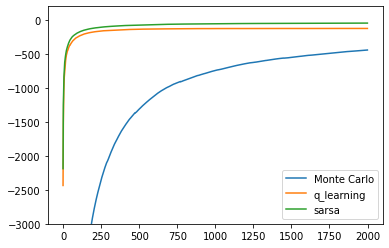

In [26]:

plot_q_reward = []
average_q_value = []
plot_s_reward = []
average_s_value = []
for simulate in range(10):
    q_reward,tempQ = Q_learning()
    s_reward,tempS = sarsa()
    q_reward = averages(q_reward)
    s_reward = averages(s_reward)
    plot_q_reward.append(q_reward)
    average_q_value.append(tempQ)
    plot_s_reward.append(s_reward)
    average_s_value.append(tempS)
    
average_q_value = np.average(average_q_value, axis = 0)
average_s_value = np.average(average_s_value, axis = 0)
Monte_Carlo()
plt.plot(np.average(plot_q_reward,axis=0),label='q_learning')
plt.plot(np.average(plot_s_reward,axis=0),label='sarsa')
plt.ylim(-3000, 200)
plt.legend()
plt.show()
